In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Load Tata Steel stock data
df = pd.read_csv("tatasteel_stock.csv")

df.head()

,Date,Price,High,Low,Open,Volume
0,1996-01-01,8.987900,9.010454,8.866107,8.976623,10242229
1,1996-01-02,8.820998,9.010455,8.798444,8.976624,16954313
2,1996-01-03,8.823254,9.021732,8.798444,8.820998,13514114
3,1996-01-04,8.543581,8.683418,8.345102,8.683418,34785820
4,1996-01-05,8.374422,8.480427,8.288716,8.439831,30138033


In [5]:
df = df[["Price"]].dropna()
df.columns = ["y"]
df["Date"] = df.index

In [6]:
# Train-test split
train_size = int(len(df) * 0.85)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [7]:
# Build SARIMAX model (example: seasonal = 12 months)
model = SARIMAX(
    train["y"],
    order=(1, 1, 1),             # ARIMA (p,d,q)
    seasonal_order=(1, 1, 1, 12), # Seasonal (P,D,Q,s)
    enforce_stationarity=False,
    enforce_invertibility=False
)

In [8]:
model_fit = model.fit(disp=False)

In [9]:
# Forecast
n_forecast = len(test)
forecast = model_fit.forecast(steps=n_forecast)
forecast.index = test.index

In [10]:
# Evaluation
mse = mean_squared_error(test["y"], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test["y"], forecast)
r2 = r2_score(test["y"], forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 63.56
MAE: 58.61
R²: -4.72


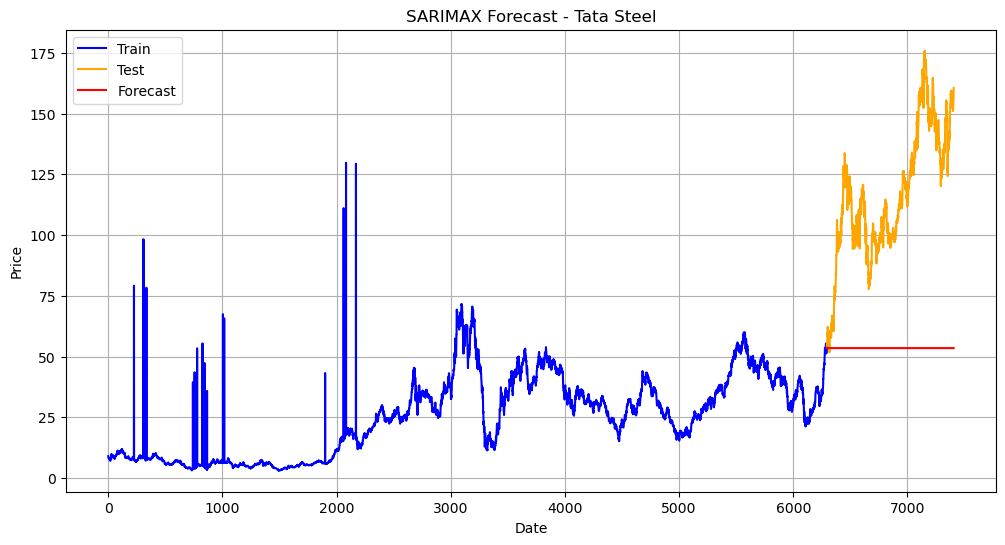

In [21]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(train["Date"], train["y"], label="Train", color="blue")
plt.plot(test["Date"], test["y"], label="Test", color="orange")
plt.plot(forecast.index, forecast, label="Forecast", color="red")
plt.title("SARIMAX Forecast - Tata Steel")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()